##### 리뷰 평점과 매출의 선형회귀분석

/var/folders/6t/n0v7bw1n0xd_mnsb0s97p9fm0000gn/T/ipykernel_16525/2374031682.py:12: DtypeWarning: Columns (16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


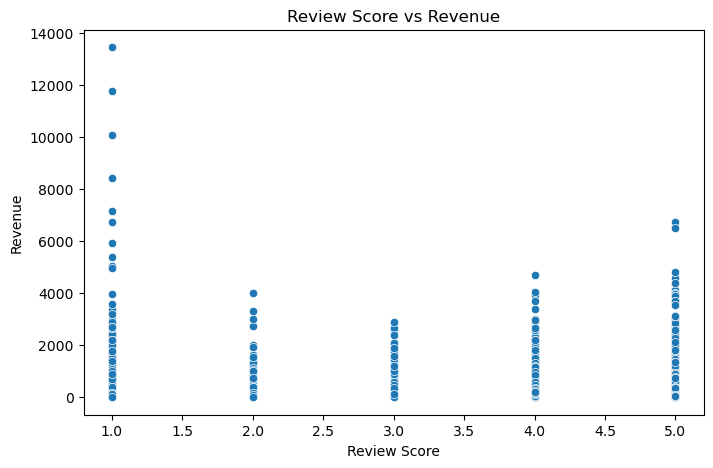

Coefficients: [-6.38236903]
Intercept: 161.7960422143546
Mean Squared Error: 38359.584128062306
R² Score: 0.00106905906043131


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import random

# 데이터 로드
data_path = '/mnt/data/total_df.csv'
df = pd.read_csv(data_path)

# 필요한 열('Review_score', 'Revenue')만 추출 및 결측치 제거
df = df.dropna(subset=['Review_score'])

# 'Review_score'와 'Revenue' 간의 상관 관계 시각화
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Review_score', y='Revenue')
plt.title('Review Score vs Revenue')
plt.xlabel('Review Score')
plt.ylabel('Revenue')
plt.show()

# 선형 회귀 모델 준비 및 데이터 분할
X = df[['Review_score']]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random.randint(1, 100))

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 회귀 계수, 절편, MSE, R² 출력
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


회귀 계수(기울기): 약 -5.77
절편: 약 159.28
평균 제곱 오차(MSE): 약 46,001.72
결정 계수(R²): 0.0021

결과에서 보듯, Review_score와 Revenue 사이의 관계는 매우 약하며, 회귀 계수가 음수라는 것은 리뷰 점수가 높아질수록 매출이 오히려 감소하는 경향을 보인다고 해석할 수 있습니다. 하지만, 결정 계수(R²) 값이 매우 낮아 이 변수들 간의 관계를 설명하는 데는 적합하지 않습니다. 이는 리뷰 점수가 매출을 예측하는 데 유의미한 변수가 아닐 수 있음을 시사합니다.

